<h3 align=center>Line Plots<h3>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Load seaice dataset from seaborn library
seaice = sns.load_dataset("seaice")
# Display the first few rows of the dataset
print(seaice)

            Date  Extent
0     1980-01-01  14.200
1     1980-01-03  14.302
2     1980-01-05  14.414
3     1980-01-07  14.518
4     1980-01-09  14.594
...          ...     ...
13170 2019-12-27  12.721
13171 2019-12-28  12.712
13172 2019-12-29  12.780
13173 2019-12-30  12.858
13174 2019-12-31  12.889

[13175 rows x 2 columns]


In [6]:
#Create year and day of the year from Date column of seaice dataset
seaice['Year'] = seaice['Date'].dt.year
seaice['Day'] = seaice['Date'].dt.dayofyear

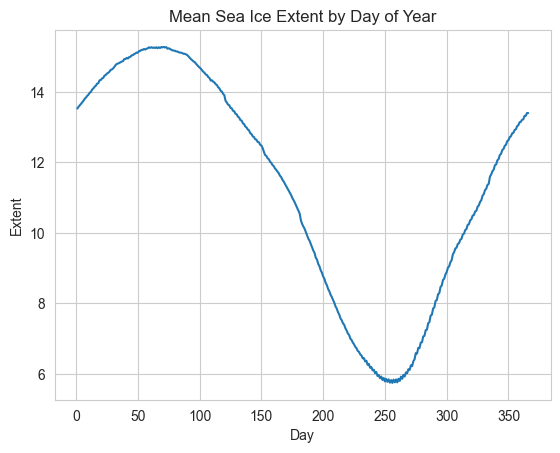

In [7]:
#Set seaborn style
sns.set_style("whitegrid")

#Create line plot
seaice_simple = seaice.groupby(["Day"])["Extent"].mean()
ax = seaice_simple.plot.line(x="Day", y="Extent", label="mean")
plt.ylabel("Extent")
plt.title("Mean Sea Ice Extent by Day of Year")
plt.show()

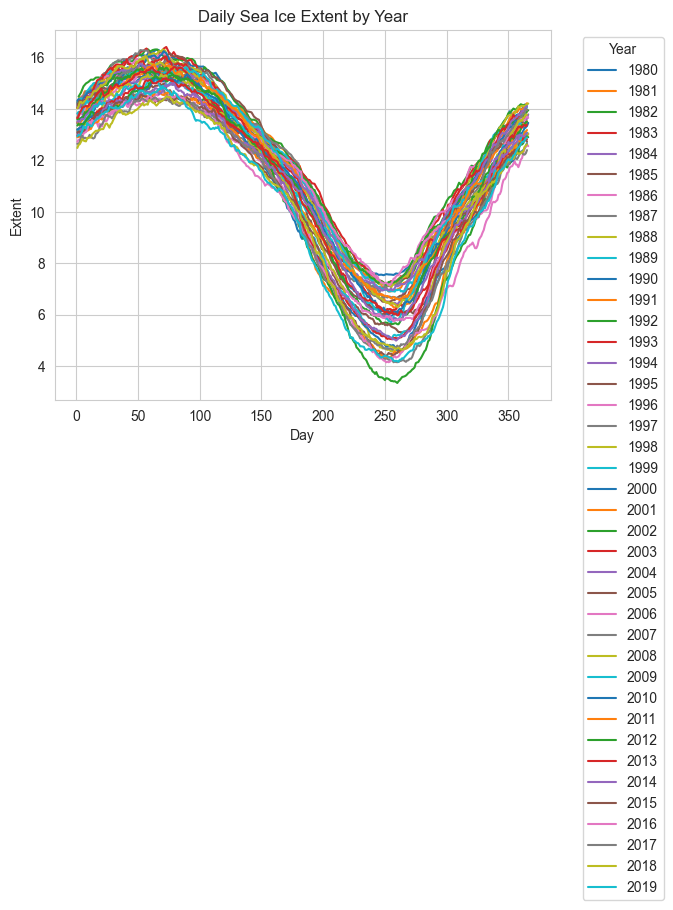

In [8]:
#Plot line plot for the daily extent of ice for all years
fig, ax = plt.subplots()
for Year, seaice_df in seaice.groupby("Year"):
    seaice_df.plot.line(x="Day", y="Extent", ax=ax, label=Year)
plt.ylabel("Extent")
plt.title("Daily Sea Ice Extent by Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


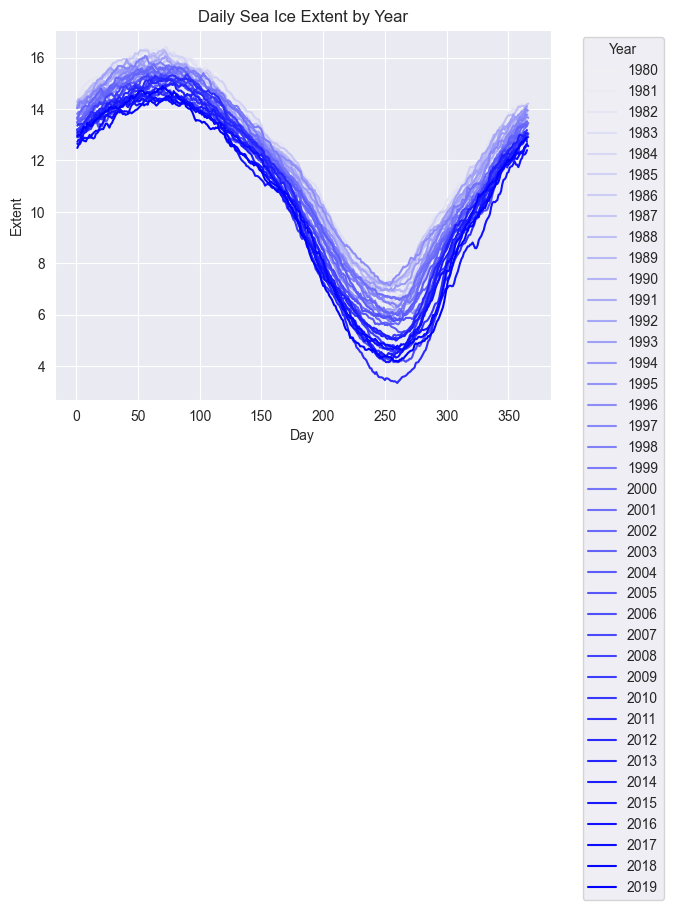

In [9]:
#Improve the plot by changing the color palette
color_palette = dict(zip(seaice['Year'].unique(), sns.color_palette("light:b", n_colors=len(seaice['Year'].unique()))))

#Plot line plot for the daily extent of ice for all years with color palette
sns.set_style("darkgrid")
fig, ax = plt.subplots()
for Year, seaice_df in seaice.groupby("Year"):
    seaice_df.plot.line(x="Day", y="Extent", ax=ax, label=Year,color=color_palette[Year])   
plt.ylabel("Extent")
plt.title("Daily Sea Ice Extent by Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
#Create lineplot with data by decades
seaice["Decades"] = (seaice["Year"]//10) * 10
print(seaice)

            Date  Extent  Year  Day  Decades
0     1980-01-01  14.200  1980    1     1980
1     1980-01-03  14.302  1980    3     1980
2     1980-01-05  14.414  1980    5     1980
3     1980-01-07  14.518  1980    7     1980
4     1980-01-09  14.594  1980    9     1980
...          ...     ...   ...  ...      ...
13170 2019-12-27  12.721  2019  361     2010
13171 2019-12-28  12.712  2019  362     2010
13172 2019-12-29  12.780  2019  363     2010
13173 2019-12-30  12.858  2019  364     2010
13174 2019-12-31  12.889  2019  365     2010

[13175 rows x 5 columns]


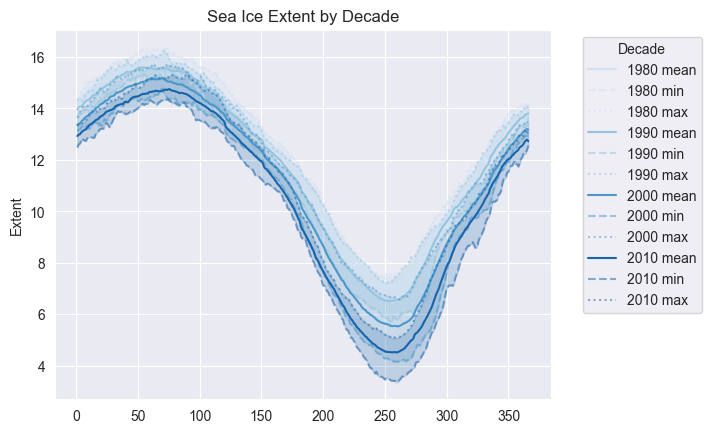

In [11]:
# Create a line-area plot for max, min and mean values per Decade

# Ensure seaice_adv is defined
if 'seaice_adv' not in locals():
    seaice_adv = seaice.groupby(['Decades', 'Day'])['Extent'].agg(['count', 'mean', 'std', 'min', 'max', 'median', 'quantile']).reset_index()

color_palette2 = dict(zip(seaice['Decades'].unique(), sns.color_palette("Blues", n_colors=len(seaice['Decades'].unique()))))

fig, ax = plt.subplots()
for Decade in seaice_adv['Decades'].unique():
    df_decade = seaice_adv[seaice_adv['Decades'] == Decade]
    ax.plot(df_decade['Day'], df_decade['mean'], color=color_palette2[Decade], label=f"{Decade} mean")
    ax.plot(df_decade['Day'], df_decade['min'], color=color_palette2[Decade], linestyle='--', alpha=0.5, label=f"{Decade} min")
    ax.plot(df_decade['Day'], df_decade['max'], color=color_palette2[Decade], linestyle=':', alpha=0.5, label=f"{Decade} max")
    ax.fill_between(df_decade['Day'], df_decade['min'], df_decade['max'], color=color_palette2[Decade], alpha=0.2)

plt.legend(title="Decade", bbox_to_anchor=(1.05, 1))
plt.ylabel("Extent")
plt.title("Sea Ice Extent by Decade")
plt.show()

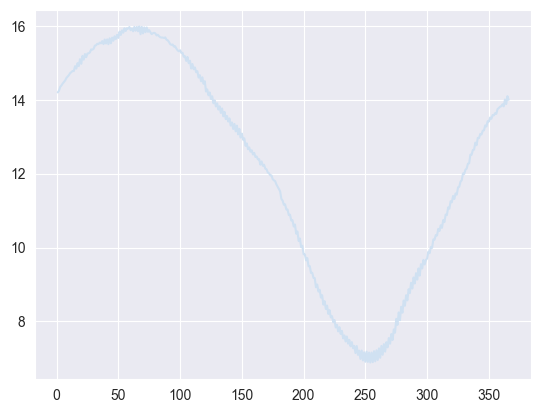

<class 'KeyError'>: '25%'

In [12]:
#Use 1st and 3rd quartiles rather than extreme values

# Create a line-area plot for max, min and mean values per Decade

# Ensure seaice_adv is defined
if 'seaice_adv' not in locals():
    seaice_adv = seaice.groupby(['Decades', 'Day'])['Extent'].agg(['count', 'mean', 'std', 'min', 'max', 'median', 'quantile']).reset_index()

color_palette2 = dict(zip(seaice['Decades'].unique(), sns.color_palette("Blues", n_colors=len(seaice['Decades'].unique()))))

fig, ax = plt.subplots()
for Decade in seaice_adv['Decades'].unique():
    df_decade = seaice_adv[seaice_adv['Decades'] == Decade]
    ax.plot(df_decade['Day'], df_decade['mean'], color=color_palette2[Decade], label=f"{Decade} mean")
    ax.plot(df_decade['Day'], df_decade['25%'], color=color_palette2[Decade], linestyle='--', alpha=0.5, label=f"{Decade} 1st quartile")
    ax.plot(df_decade['Day'], df_decade['75%'], color=color_palette2[Decade], linestyle=':', alpha=0.5, label=f"{Decade} 3rd quartile")
    ax.fill_between(df_decade['Day'], df_decade['25%'], df_decade['75%'], color=color_palette2[Decade], alpha=0.2)

plt.legend(title="Decade", bbox_to_anchor=(1.05, 1))
plt.ylabel("Extent")
plt.title("Sea Ice Extent by Decade")
plt.show()

In [ ]:
#Using Brighter colors as color palette
color_palette3 = dict(zip(seaice['Decades'].unique(), sns.color_palette("bright", n_colors=len(seaice['Decades'].unique()))))

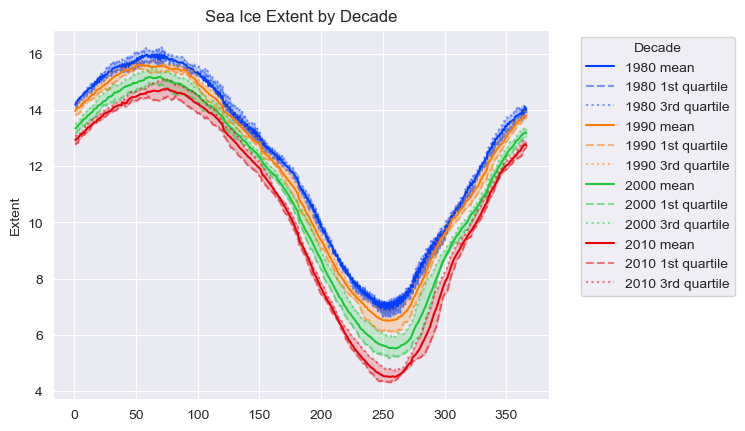

In [ ]:
fig, ax = plt.subplots()
for Decade in seaice_adv['Decades'].unique():
    df_decade = seaice_adv[seaice_adv['Decades'] == Decade]
    ax.plot(df_decade['Day'], df_decade['mean'], color=color_palette3[Decade], label=f"{Decade} mean")
    ax.plot(df_decade['Day'], df_decade['25%'], color=color_palette3[Decade], linestyle='--', alpha=0.5, label=f"{Decade} 1st quartile")
    ax.plot(df_decade['Day'], df_decade['75%'], color=color_palette3[Decade], linestyle=':', alpha=0.5, label=f"{Decade} 3rd quartile")
    ax.fill_between(df_decade['Day'], df_decade['25%'], df_decade['75%'], color=color_palette3[Decade], alpha=0.2)

plt.legend(title="Decade", bbox_to_anchor=(1.05, 1))
plt.ylabel("Extent")
plt.title("Sea Ice Extent by Decade")
plt.show()